In [13]:
import pandas as pd
df = pd.read_csv("assignment3c.csv")
df['bm'] = (df['bid'] + df['ask'])/2
df_buy = df[df['buysell'] == 'B']
df_sell =  df[df['buysell'] == 'S']

In [19]:
print(df_buy.shape)
print(df_sell.shape)
print(df_buy)

(21867, 9)
(21834, 8)
      symbol            time         bid         ask  shares buysell  \
1       AMZN  28658000000000  157.100006  158.899994   100.0       B   
17      AMZN  29093000000000  157.199997  157.500000    30.0       B   
32      AMZN  29982400000000  157.330002  157.550003    15.0       B   
95      AMZN  32496500000000  157.429993  158.000000    20.0       B   
102     AMZN  32530000000000  157.440002  158.000000    23.0       B   
...      ...             ...         ...         ...     ...     ...   
96506   AMZN  59052400000000  153.770004  153.800003   200.0       B   
96526   AMZN  61313500000000  153.750000  153.800003    76.0       B   
96544   AMZN  61955300000000  153.779999  153.800003   500.0       B   
96545   AMZN  61956500000000  153.779999  153.800003   100.0       B   
96553   AMZN  63817100000000  153.699997  153.750000   100.0       B   

            price          bm       cost  
1      157.990005  158.000000  -0.632563  
17     157.490005  157.3499

In [25]:
df_buy['cost'] = 10000*(df_buy['price'] - df_buy['bm'])/df_buy['bm']
VWATC_buy = (df_buy['cost'] * df_buy['shares']).sum() /df_buy['shares'].sum() 

df_sell['cost'] = 10000*(df_sell['bm'] - df_sell['price'])/df_sell['bm']
VWATC_sell = (df_sell['cost'] * df_sell['shares']).sum() /df_sell['shares'].sum() 

In [27]:
print(VWATC_buy)
print(VWATC_sell)

0.625084624094974
0.8389693094991193


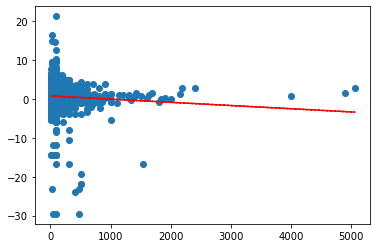

In [46]:
import matplotlib.pyplot as plt
import numpy as np

x = df_buy['shares']
y = df_buy['cost']
z = np.polyfit(x,y,1)
p = np.poly1d(z)
plt.plot(x,y,'o')
plt.plot(x, p(x), 'r--') 
plt.show()

In [41]:
test = df_buy.copy()
test

,symbol,time,bid,ask,shares,buysell,price,bm,cost
1,AMZN,28658000000000,157.100006,158.899994,100.0,B,157.990005,158.000000,-0.632563
17,AMZN,29093000000000,157.199997,157.500000,30.0,B,157.490005,157.349998,8.897811
32,AMZN,29982400000000,157.330002,157.550003,15.0,B,157.500000,157.440002,3.810820
95,AMZN,32496500000000,157.429993,158.000000,20.0,B,157.949997,157.714996,14.900330
102,AMZN,32530000000000,157.440002,158.000000,23.0,B,157.979996,157.720001,16.484561
...,...,...,...,...,...,...,...,...,...
96506,AMZN,59052400000000,153.770004,153.800003,200.0,B,153.800003,153.785004,0.975349
96526,AMZN,61313500000000,153.750000,153.800003,76.0,B,153.800003,153.775002,1.625853
96544,AMZN,61955300000000,153.779999,153.800003,500.0,B,153.800003,153.790001,0.650377
96545,AMZN,61956500000000,153.779999,153.800003,100.0,B,153.800003,153.790001,0.650377


In [44]:
test = test.sort_values(by = 'cost')
test_vol = test.sort_values(by = 'shares', ascending=False)

In [45]:
test_vol

,symbol,time,bid,ask,shares,buysell,price,bm,cost
49200,AMZN,40804300000000,152.960007,152.970001,5065.0,B,153.009995,152.965004,2.941232
53817,AMZN,41883200000000,153.350006,153.399994,4900.0,B,153.399994,153.375000,1.629594
96248,AMZN,57577600000000,153.779999,153.800003,4000.0,B,153.800003,153.790001,0.650377
56893,AMZN,42908800000000,153.020004,153.050003,2400.0,B,153.080002,153.035004,2.940380
49204,AMZN,40804300000000,152.960007,152.970001,2196.0,B,153.009995,152.965004,2.941232
...,...,...,...,...,...,...,...,...,...
35860,AMZN,38509700000000,153.179993,153.250000,1.0,B,153.190002,153.214996,-1.631299
35853,AMZN,38509400000000,153.199997,153.229996,1.0,B,153.190002,153.214996,-1.631296
36337,AMZN,38548400000000,153.220001,153.250000,1.0,B,153.210007,153.235001,-1.631083
35667,AMZN,38481400000000,153.080002,153.110001,1.0,B,153.100006,153.095001,0.326915
